Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.optimize import fmin

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan():
    a_11, a_12, b_1 = map(float, input("Enter first equation coefficients:\n").split(sep=" "))
    a_21, a_22, b_2 = map(float, input("Enter second equation coefficients:\n").split(sep=" "))

    coefficients = np.array([[a_11, a_12], [a_21, a_22]])
    results = np.array([b_1, b_2])

    x, y = np.linalg.solve(coefficients, results)
    print(f"Answer:\nx = {round(x, 1)}\ny = {round(y, 1)}")


if __name__ == "__main__":
    linan()

Enter first equation coefficients:
3 2 1
Enter second equation coefficients:
1 2 3
Answer:
x = -1.0
y = 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n):
    matrix = np.zeros([n, n])
    matrix[:, 0] = 1
    matrix[0, :] = 1
    matrix[-1, :] = 1
    matrix[:, -1] = 1

    return matrix


if __name__ == '__main__':
    n = int(input("Enter matrix size: "))
    print(repr(decorate_matrix(n)))


Enter matrix size: 5
array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
def f(x, a, b):
    return (x + a) ** 2 - b


def g(x, a, b):
    return np.abs(f(x, a, b))


def optimize_functions(a, b):
    f_min, g_min = round(float(fmin(func=f, x0=0, args=(a, b), disp=False)), 1), round(
        float(fmin(func=g, x0=0, args=(a, b), disp=False)), 1)

    answer = ([f_min], [g_min])

    dist_between_min = 2 * abs(a - g_min)
    g_min_left = a - dist_between_min
    g_min_right = a + dist_between_min

    if g(g_min, a, b) == g(g_min_left, a, b):
        answer[1].append(g_min_left)

    if g(g_min, a, b) == g(g_min_right, a, b):
        answer[1].append(g_min_right)

    return answer


if __name__ == '__main__':
    a, b = map(float, input("Enter a and b:\n").split(sep=" "))
    print(*optimize_functions(a, b))


Enter a and b:
3 4
[-3.0] [-1.0, -5.0]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

Enter a and b:
3 4


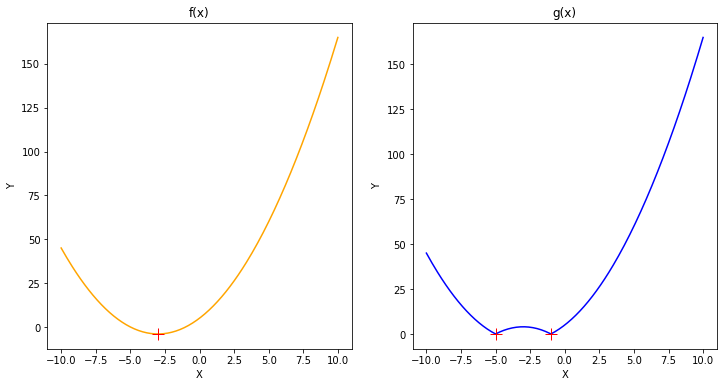

In [ ]:
def draw_plots(a, b):
    f_min, g_min = optimize_functions(a, b)[0:2]

    x = np.linspace(-10.0, 10.0, 201)
    f_val = f(x, a, b)
    g_val = g(x, a, b)

    figure, axis = plt.subplots(1, 2)
    figure.set_size_inches(12, 6)

    for item in axis:
        item.set_xlabel("X")
        item.set_ylabel("Y")

    axis[0].plot(x,
                 f_val,
                 color="orange",
                 markevery=np.where(f_val == f(f_min[0], a, b))[0],
                 marker="+",
                 markeredgecolor="red",
                 markersize=12)
    axis[0].set_title("f(x)")

    axis[1].plot(x,
                 g_val,
                 color="blue",
                 markevery=np.where(g_val == g(g_min[0], a, b))[0],
                 marker="+",
                 markeredgecolor="red",
                 markersize=12)
    axis[1].set_title("g(x)")

    plt.show()


if __name__ == '__main__':
    a, b = map(float, input("Enter a and b:\n").split(sep=" "))
    draw_plots(a, b)


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
def C(n, k) -> float:
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))


if __name__ == "__main__":
    human_amount = 1000
    throw_amount = 10
    options_possible = 2
    heads_possibility = 0.5
    tails_possibility = 0.5

    print("Часть 1\n")
    print("Из 1024 опций, возникающих при 10 бросках, человека устраивают лишь 2, расчитаем вероятность "
          "удовлетворительного и неудовлетворительного исходов.")
    winning_options = 2
    p = winning_options / options_possible ** 10
    q = 1 - p
    print("По формуле Бернулли найдём обратную вероятность, после чего вычтем её из 1.")
    P = 1 - (C(human_amount, 0) * p ** 0 * q ** human_amount)
    print(f"Вероятность = {P:.6}\n")

    print("Часть 2\n")
    print("Существует 8 победных комбинаций для каждой из сторон монетки. 5 - для 8 подряд, 2 - 9 и 1 на 10")
    winning_options = 2 * 8
    p = winning_options / options_possible ** 10
    q = 1 - p
    print("По формуле Бернулли найдём обратную вероятность, после чего вычтем её из 1.")
    P = 1 - (C(human_amount, 0) * p ** 0 * q ** human_amount)
    print(f"Вероятность = {P:.9}\n")

    print("Часть 3\n")
    print("Из 1024 опций, возникающих при 10 бросках, человека устраивают лишь 2, расчитаем вероятность "
          "удовлетворительного и неудовлетворительного исходов.")
    winning_options = 2
    p = winning_options / options_possible ** 10
    q = 1 - p
    print("По формуле Бернулли найдём вероятность для 3 победителей.")
    P = C(human_amount, 3) * p ** 3 * q ** (human_amount - 3)
    print(f"Вероятность = {P:.6}\n")


Часть 1

Из 1024 опций, возникающих при 10 бросках, человека устраивают лишь 2, расчитаем вероятность удовлетворительного и неудовлетворительного исходов.
По формуле Бернулли найдём обратную вероятность, после чего вычтем её из 1.
Вероятность = 0.85844

Часть 2

Существует 8 победных комбинаций для каждой из сторон монетки. 5 - для 8 подряд, 2 - 9 и 1 на 10
По формуле Бернулли найдём обратную вероятность, после чего вычтем её из 1.
Вероятность = 0.999999855

Часть 3

Из 1024 опций, возникающих при 10 бросках, человека устраивают лишь 2, расчитаем вероятность удовлетворительного и неудовлетворительного исходов.
По формуле Бернулли найдём вероятность для 3 победителей.
Вероятность = 0.176287

